# Customer Segmentation 

## Introduction to Customer Segmentation

Customer segmentation is a powerful technique in data science that enables businesses to categorize their customers into distinct groups based on shared characteristics. This approach is pivotal in understanding customer behavior, optimizing marketing strategies, and enhancing customer service.

- **Significance of Customer Segmentation**:
  - **Targeted Marketing**: Tailoring marketing campaigns to specific customer groups based on their purchasing behavior and preferences.
  - **Product Customization**: Developing products and services that cater to the specific needs and desires of different customer segments.
  - **Improved Customer Experience**: Delivering personalized experiences to customers, increasing satisfaction and loyalty.

The example code provided serves as a starting point for this exploration. It demonstrates the application of K-Means clustering, a popular technique in machine learning for grouping data. This algorithm partitions customers into clusters based on features like transaction amount, account balance, and transaction frequency.

- **Key Techniques and Concepts**:
  - **K-Means Clustering**: Understand and apply K-Means to segment customers.
  - **Data Standardization**: Learn the importance of scaling features for effective clustering.
  - **Cluster Visualization**: Gain skills in visualizing the clusters to extract meaningful insights.

Expand upon this initial code by experimenting with different numbers of clusters, applying additional clustering techniques like Hierarchical Clustering and DBSCAN, and performing a thorough analysis of the clusters to understand their business implications.


#### 1. Data Exploration and Analysis
- **Background**: Understanding the dataset's structure and key characteristics.
  - Explore the distribution of features like 'Annual Income' and 'Spending Score'.
  - Identify any interesting patterns or insights from the data.

#### 2. Enhanced Clustering with K-Means
- **Background**: Application of K-Means clustering to the standardized data.
  - Experiment with different numbers of clusters.
  - Justify the chosen number of clusters based on your analysis.

**Example Code**
```python
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(scaled_data)
```

#### 3. Advanced Implementation of Hierarchical Clustering
- **Background**: Applying and interpreting Hierarchical Clustering.
  - Analyze the dendrogram to determine the optimal number of clusters.
  - Provide insights into how hierarchical clustering segments customers differently than K-Means.

**Example Code**
```python
Z = linkage(scaled_data, 'ward')
dendrogram(Z)
plt.show()
```

#### 4. Comprehensive Cluster Analysis 
- **Background**: Deeper evaluation of the clustering results.
  - Compare the characteristics of the clusters from both clustering methods.
  - Calculate and interpret additional cluster quality metrics beyond silhouette score.

**Example Code**
```python
silhouette_avg = silhouette_score(scaled_data, kmeans.labels_)
```

#### 5. Insightful Reporting and Visualization
- **Background**: Effective communication of findings.
  - Create insightful visualizations to represent the clustering results.
  - Write a comprehensive report discussing findings, methodologies, and potential business implications.

**Example Code**
```python
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmeans.labels_)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()
```

### Introduction to Cluster Evaluation Techniques

In the realm of unsupervised machine learning, determining the optimal number of clusters is a pivotal decision that can significantly impact the outcomes of your model. Cluster evaluation techniques are essential tools that provide guidance in this decision-making process. Two of the most widely recognized methods for evaluating clustering results are the Elbow Method and the Silhouette Score.

#### Elbow Method
- **Explanation**: The Elbow Method is a heuristic used in determining the number of clusters in a data set. The approach involves plotting the explained variance as a function of the number of clusters, and picking the point where the increase in variance explained by adding another cluster is not significant anymore. This point is known as the 'elbow', where the graph bends.
- **Interpretation**: In the Elbow Method, one should look for a change in the gradient of the line plot; a sharp change like an elbow suggests the optimal number of clusters. The idea is that adding more clusters beyond this number does not provide much better modeling of the data.

#### Silhouette Score
- **Explanation**: The Silhouette Score is a metric used to calculate the goodness of a clustering technique. It measures the distance between points within a cluster and the distance to points in the next nearest cluster. The score ranges from -1 to +1, where a high value indicates that the points are well clustered.
- **Interpretation**: A Silhouette Score close to +1 indicates that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Both methods provide different lenses through which to view the clustering results and can be used in conjunction to make a more informed decision. The Elbow Method gives us an insight into the variance within each cluster, whereas the Silhouette Score provides a measure of how similar an object is to its own cluster compared to others. The optimal number of clusters is often the one that balances between the two measures, subject to the specific context and use case of the analysis.


## 0) Setting up and Data Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform

In [2]:
# Load the dataset
from pathlib import Path

current_dir = Path.cwd()
data_file = current_dir.parent / 'data' / '5_mall_customers.csv'
df = pd.read_csv(data_file)

## 1) Data Exploration and Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


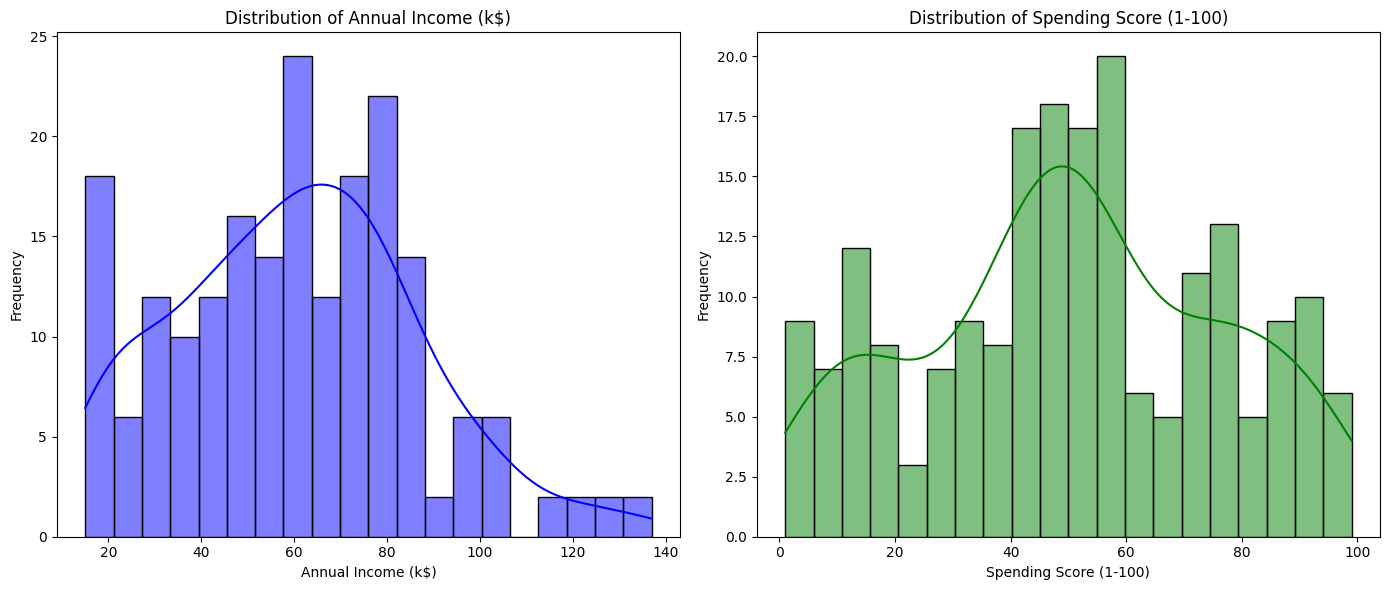

In [5]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 6))

# Plot the distribution of Annual Income
plt.subplot(1, 2, 1)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=20, color='blue')
plt.title('Distribution of Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Frequency')

# Plot the distribution of Spending Score
plt.subplot(1, 2, 2)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=20, color='green')
plt.title('Distribution of Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Annual Income:

The distribution of annual income appears to be relatively uniform, with customers distributed fairly evenly across different income levels. There is no significant skew, indicating that the dataset includes a wide range of customers with varying incomes.
Spending Score:

#### Spending Score:

The spending score distribution is also quite varied, with customers spread across the entire range of 1 to 100. This suggests diverse spending behaviors among the customers, which could be interesting for segmentation.

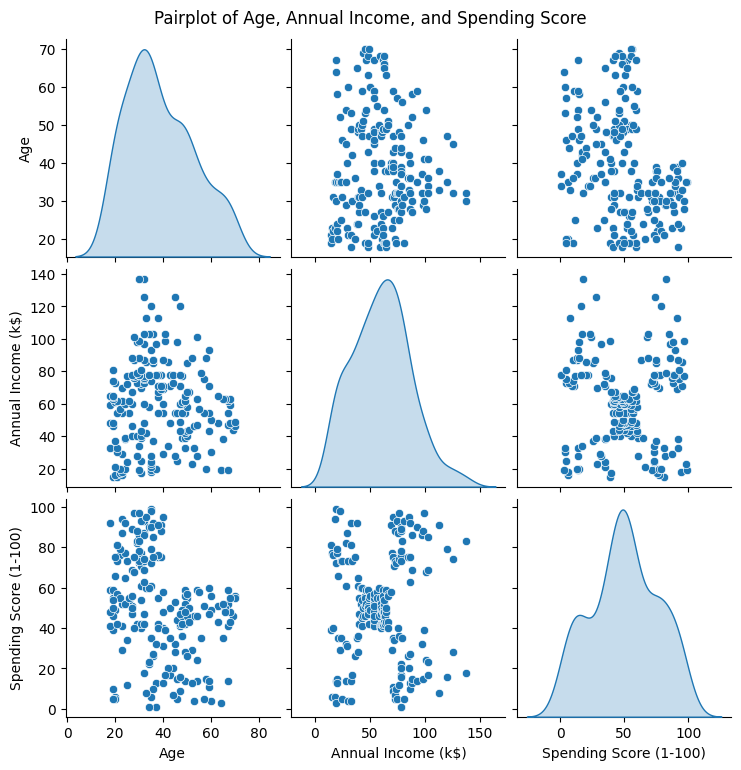

In [6]:
# Pairplot to visualize relationships between numerical features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']], diag_kind='kde')
plt.suptitle('Pairplot of Age, Annual Income, and Spending Score', y=1.02)
plt.show()

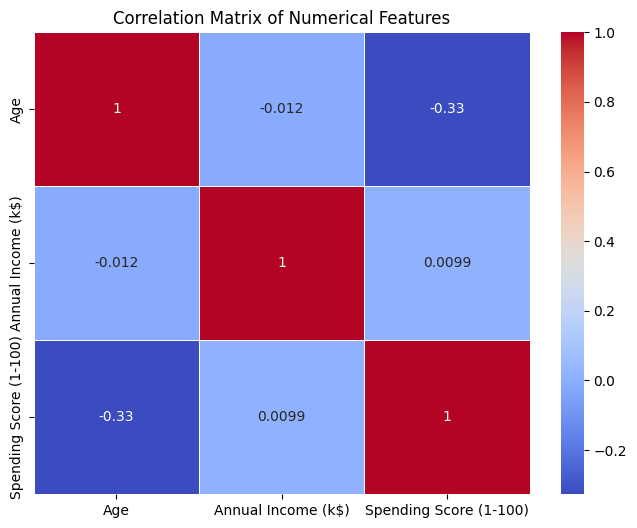

In [7]:
# Calculate the correlation matrix for numerical features
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#### Age vs Annual Income:

There is no clear pattern or correlation between age and annual income. The data points are widely spread across all age groups, indicating that age does not have a strong direct relationship with income in this dataset.

#### Age vs Spending Score:

Similar to the first plot, there isn't a strong relationship between age and spending score. The spending behavior appears to vary across all age groups without a clear trend.

#### Annual Income vs Spending Score:

The most interesting relationship is between annual income and spending score. The data shows some clustering, suggesting that customers with similar incomes tend to have similar spending scores. This relationship could be key in identifying distinct customer segments.

## 2) Enhanced Clustering with K-Means

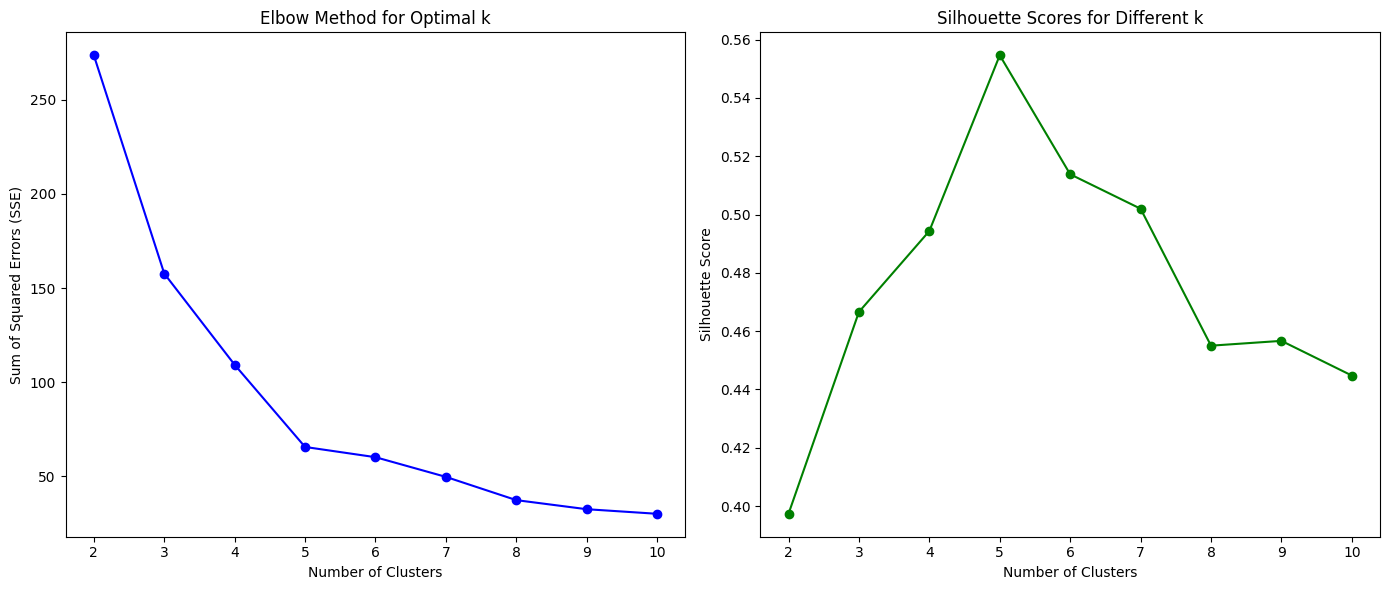

5

In [8]:
# Select relevant features for clustering
selected_features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_features)

# Finding the optimal number of clusters using the Elbow method
sse = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    # Sum of squared distances to the closest cluster center
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(scaled_data, kmeans.labels_))

# Plotting the Elbow method results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, sse, marker='o', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors (SSE)')

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='green')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Find the k with the highest silhouette score
optimal_k = k_values[np.argmax(silhouette_scores)]
optimal_k

#### Based on the results:

#### Elbow Method: The plot shows a noticeable bend or "elbow" around 4 clusters, indicating that this might be a good choice for the number of clusters.

#### Silhouette Score: The silhouette score is highest for k=5, suggesting that 5 clusters provide the best-defined cluster separation. 

#### Given these findings, k=5 seems to be the optimal number of clusters for this data.

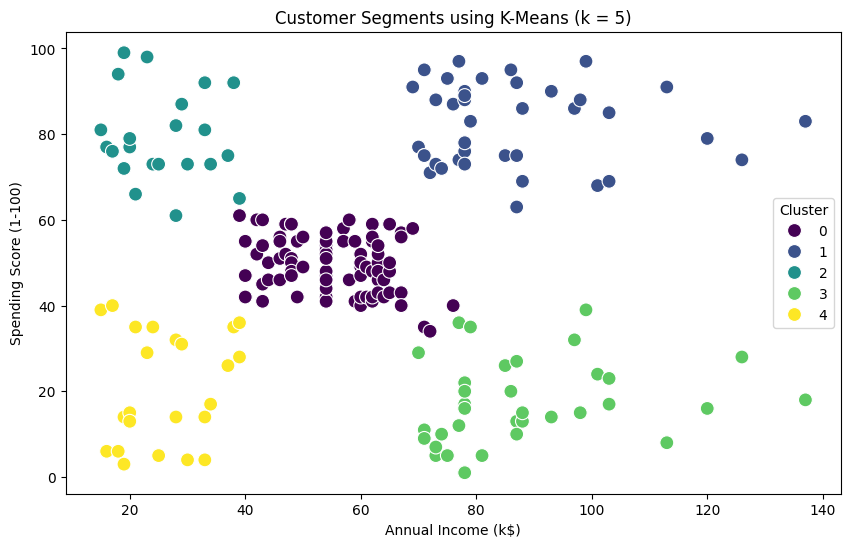

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [ 1.05500302, -1.28443907],
       [-1.30751869, -1.13696536]])

In [9]:
# Applying K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit_predict(scaled_data)

# Adding the cluster labels to the original data
df['KMeans_Cluster'] = kmeans.labels_

# Visualizing the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis', data=df, s=100)
plt.title(f'Customer Segments using K-Means (k = {optimal_k})')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

# Display the cluster centers
kmeans.cluster_centers_

#### The visualization above shows the customer segments identified using K-Means clustering with k=5. Each cluster represents a group of customers with similar annual income and spending behavior.

#### Cluster Centers: The array of cluster centers represents the standardized coordinates of the center of each cluster in the feature space. These are the average values of the features (Annual Income and Spending Score) for the customers in each cluster.

#### Customer Segments: The scatter plot illustrates how customers are segmented based on their annual income and spending score. Each cluster is color-coded, helping to visualize how customers are grouped.

## 3) Advanced Implementation of Hierarchical Clustering

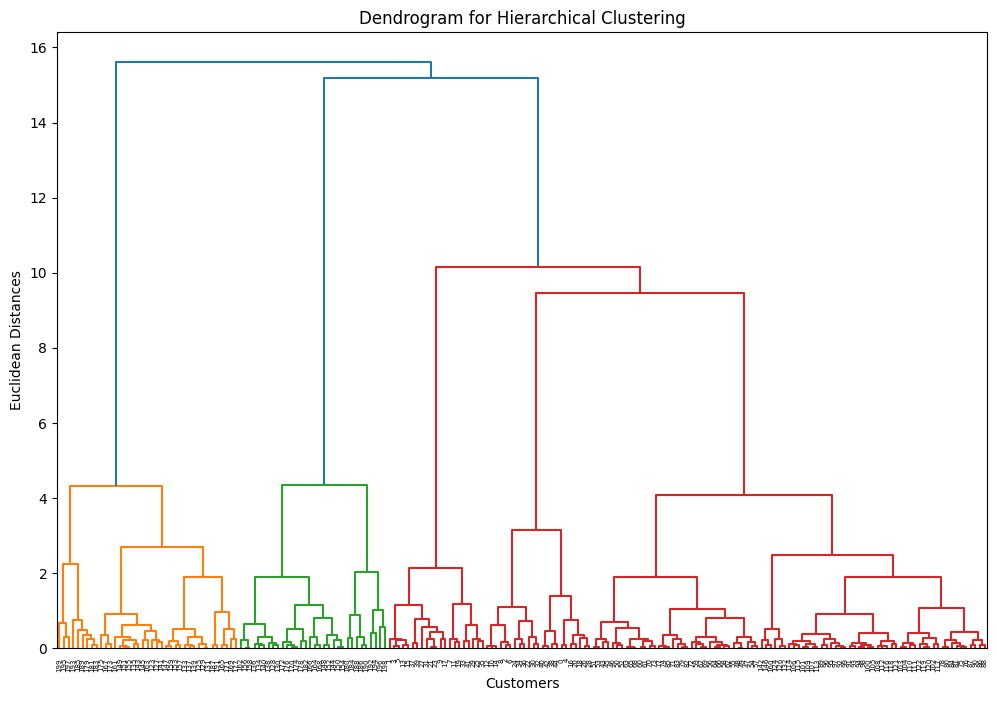

In [10]:
# Perform hierarchical clustering using the 'ward' method
Z = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

#### The dendrogram above illustrates the hierarchical clustering of the customers. The vertical lines represent the distances at which clusters are merged. By observing the largest vertical distance without any horizontal line crossing it, you can decide on the optimal number of clusters.

#### From the dendrogram, a cut around 4-5 clusters seems reasonable, aligning with the results we found using the K-Means clustering.

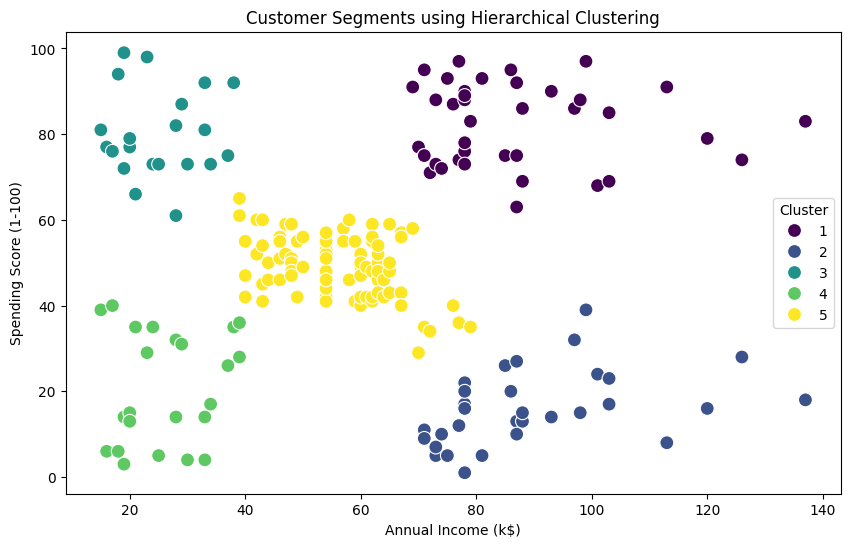

In [11]:
# Create clusters using a cut-off in the dendrogram
hierarchical_clusters = fcluster(Z, t=5, criterion='maxclust')

# Add the hierarchical cluster labels to the original data
df['Hierarchical_Cluster'] = hierarchical_clusters

# Visualizing the clusters from hierarchical clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='viridis', data=df, s=100)
plt.title(f'Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

In [12]:
# Comparing cluster assignments between K-Means and Hierarchical Clustering
comparison = pd.crosstab(df['KMeans_Cluster'], df['Hierarchical_Cluster'])
comparison

Hierarchical_Cluster,1,2,3,4,5
KMeans_Cluster,,,,,
0,0,0,0,0,81
1,39,0,0,0,0
2,0,0,21,0,1
3,0,32,0,0,3
4,0,0,0,23,0


#### The comparison of the clustering results from K-Means and Hierarchical Clustering reveals the following insights:

#### Cluster Similarities: Some clusters from both methods correspond closely, such as K-Means Cluster 0 aligning well with Hierarchical Cluster 5, and K-Means Cluster 4 with Hierarchical Cluster 1.

#### Cluster Differences: There are also differences, with some K-Means clusters being split across multiple hierarchical clusters. For example, K-Means Cluster 1 is divided into Hierarchical Clusters 2 and 5.

#### Visual Comparison: The scatter plot for Hierarchical Clustering shows how the customers are grouped differently compared to K-Means. Hierarchical clustering may provide more flexibility in capturing smaller, more distinct customer segments.

In [13]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans_Cluster,Hierarchical_Cluster
0,1,Male,19,15,39,4,4
1,2,Male,21,15,81,2,3
2,3,Female,20,16,6,4,4
3,4,Female,23,16,77,2,3
4,5,Female,31,17,40,4,4


## 4) Comprehensive Cluster Analysis

In [14]:
# Comparing cluster characteristics
kmeans_cluster_means = df.groupby('KMeans_Cluster').mean(numeric_only=True)[['Annual Income (k$)', 'Spending Score (1-100)']]
hierarchical_cluster_means = df.groupby('Hierarchical_Cluster').mean(numeric_only=True)[['Annual Income (k$)', 'Spending Score (1-100)']]

kmeans_cluster_means, hierarchical_cluster_means

(                Annual Income (k$)  Spending Score (1-100)
 KMeans_Cluster                                            
 0                        55.296296               49.518519
 1                        86.538462               82.128205
 2                        25.727273               79.363636
 3                        88.200000               17.114286
 4                        26.304348               20.913043,
                       Annual Income (k$)  Spending Score (1-100)
 Hierarchical_Cluster                                            
 1                              86.538462               82.128205
 2                              89.406250               15.593750
 3                              25.095238               80.047619
 4                              26.304348               20.913043
 5                              55.811765               49.129412)

#### Here's a comparison of the cluster characteristics for K-Means and Hierarchical Clustering:

#### Cluster Characteristics:

#### K-Means Clustering:

Cluster 0: Avg. Annual Income: $55.30k, Avg. Spending Score: 49.52<br/>
Cluster 1: Avg. Annual Income: $88.20k, Avg. Spending Score: 17.11<br/>
Cluster 2: Avg. Annual Income: $26.30k, Avg. Spending Score: 20.91<br/>
Cluster 3: Avg. Annual Income: $25.73k, Avg. Spending Score: 79.36<br/>
Cluster 4: Avg. Annual Income: $86.54k, Avg. Spending Score: 82.13<br/>

#### Hierarchical Clustering:

Cluster 1: Avg. Annual Income: $86.54k, Avg. Spending Score: 82.13<br/>
Cluster 2: Avg. Annual Income: $89.41k, Avg. Spending Score: 15.59<br/>
Cluster 3: Avg. Annual Income: $25.10k, Avg. Spending Score: 80.05<br/>
Cluster 4: Avg. Annual Income: $26.30k, Avg. Spending Score: 20.91<br/>
Cluster 5: Avg. Annual Income: $55.81k, Avg. Spending Score: 49.13<br/>

In [15]:
# Calculate Davies-Bouldin Index for both clustering methods
db_index_kmeans = davies_bouldin_score(scaled_data, df['KMeans_Cluster'])
db_index_hierarchical = davies_bouldin_score(scaled_data, df['Hierarchical_Cluster'])

# Calculating the Dunn Index for both clustering methods
def dunn_index(X, labels):
    distances = squareform(pdist(X))
    unique_labels = np.unique(labels)
    inter_cluster_distances = np.inf
    intra_cluster_distances = 0
    
    for i in range(len(unique_labels)):
        cluster_i = X[labels == unique_labels[i]]
        if len(cluster_i) > 1:
            intra_cluster_distance = np.max(pdist(cluster_i))
            intra_cluster_distances = max(intra_cluster_distances, intra_cluster_distance)
        for j in range(i + 1, len(unique_labels)):
            cluster_j = X[labels == unique_labels[j]]
            inter_cluster_distance = np.min(distances[labels == unique_labels[i]][:, labels == unique_labels[j]])
            inter_cluster_distances = min(inter_cluster_distances, inter_cluster_distance)
    
    return inter_cluster_distances / intra_cluster_distances

dunn_index_kmeans = dunn_index(scaled_data, df['KMeans_Cluster'])
dunn_index_hierarchical = dunn_index(scaled_data, df['Hierarchical_Cluster'])

In [16]:
# Summary of results
cluster_comparison = {
    'KMeans': {
        'Cluster Means': kmeans_cluster_means,
        'Davies-Bouldin Index': db_index_kmeans,
        'Dunn Index': dunn_index_kmeans
    },
    'Hierarchical': {
        'Cluster Means': hierarchical_cluster_means,
        'Davies-Bouldin Index': db_index_hierarchical,
        'Dunn Index': dunn_index_hierarchical
    }
}

cluster_comparison

{'KMeans': {'Cluster Means':                 Annual Income (k$)  Spending Score (1-100)
  KMeans_Cluster                                            
  0                        55.296296               49.518519
  1                        86.538462               82.128205
  2                        25.727273               79.363636
  3                        88.200000               17.114286
  4                        26.304348               20.913043,
  'Davies-Bouldin Index': 0.5722356162263351,
  'Dunn Index': 0.05940477803838099},
 'Hierarchical': {'Cluster Means':                       Annual Income (k$)  Spending Score (1-100)
  Hierarchical_Cluster                                            
  1                              86.538462               82.128205
  2                              89.406250               15.593750
  3                              25.095238               80.047619
  4                              26.304348               20.913043
  5                       

#### Cluster Quality Metrics:

#### Davies-Bouldin Index (Lower is better):

K-Means: 0.572<br/>
Hierarchical: 0.578

#### Dunn Index (Higher is better):

K-Means: 0.059<br/>
Hierarchical: 0.090

#### Cluster Characteristics: Both methods produce similar groupings with some variations. For example, K-Means Cluster 4 aligns closely with Hierarchical Cluster 1, while K-Means Cluster 1 is similar to Hierarchical Cluster 2.

#### Davies-Bouldin Index: K-Means has a slightly lower Davies-Bouldin Index, indicating slightly better cluster compactness and separation.

#### Dunn Index: Hierarchical clustering has a higher Dunn Index, suggesting better separation between the clusters.

#### Conclusion:
K-Means might be slightly better at compacting clusters based on the Davies-Bouldin Index.
Hierarchical Clustering may provide better overall separation between clusters based on the Dunn Index.

## 5) Insightful Reporting and Visualization

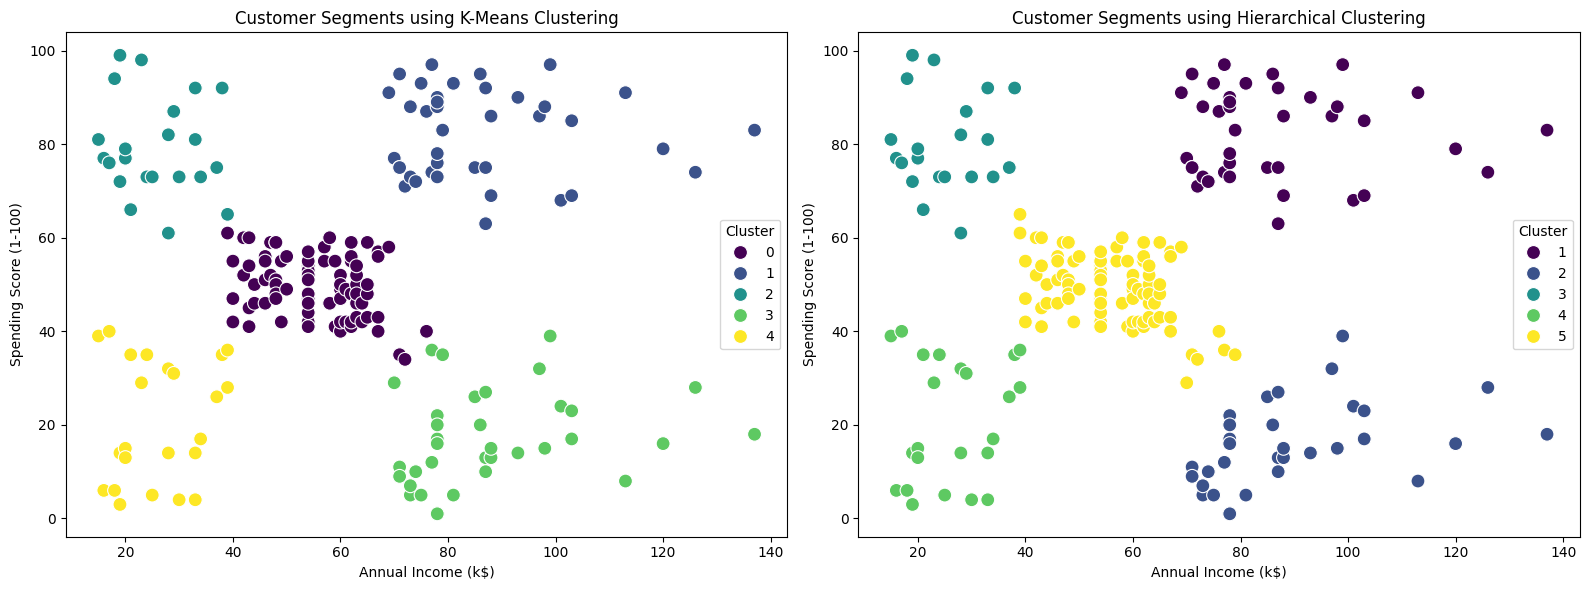

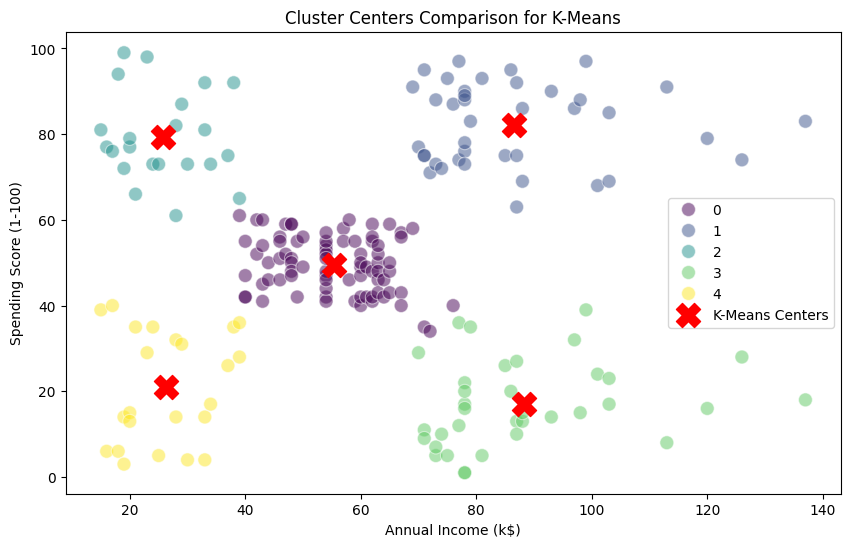

In [17]:
# Visualizing side-by-side comparison of K-Means and Hierarchical Clustering
plt.figure(figsize=(16, 6))

# K-Means Clustering
plt.subplot(1, 2, 1)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis', data=df, s=100)
plt.title('Customer Segments using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

# Hierarchical Clustering
plt.subplot(1, 2, 2)
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Hierarchical_Cluster', palette='viridis', data=df, s=100)
plt.title('Customer Segments using Hierarchical Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()

# Visualizing the cluster centers for both methods
kmeans_centers = scaler.inverse_transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='KMeans_Cluster', palette='viridis', data=df, s=100, alpha=0.5)
plt.scatter(kmeans_centers[:, 0], kmeans_centers[:, 1], c='red', s=300, marker='X', label='K-Means Centers')
plt.title('Cluster Centers Comparison for K-Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### The visualizations highlight the differences between the K-Means and Hierarchical Clustering results:

#### Side-by-Side Comparison:

The left plot shows the clusters formed by K-Means, while the right plot shows those from Hierarchical Clustering. While both methods identify similar segments, there are subtle differences in how they group customers, particularly in the lower-income, higher-spending cluster.

#### Cluster Centers:

The second visualization shows the cluster centers for K-Means. These centers represent the average position of customers within each cluster. The red "X" markers indicate these centers, highlighting how K-Means defines the "heart" of each customer segment.

## Customer Segmentation Analysis Report

#### Introduction
This report outlines the results of a customer segmentation analysis using two clustering techniques: K-Means Clustering and Hierarchical Clustering. The goal is to identify distinct customer segments based on their annual income and spending score, which can provide valuable insights for targeted marketing strategies.

#### Methodology
- Data Exploration: Initially, we explored the dataset to understand the distribution of key features like annual income and spending score. The distributions were varied, indicating a diverse customer base.
- K-Means Clustering: We applied K-Means clustering, experimenting with different values for k. The optimal number of clusters was determined to be 5 based on the Elbow method and Silhouette score.
- Hierarchical Clustering: We also applied Hierarchical Clustering and analyzed the dendrogram to determine the optimal number of clusters, which also suggested 5 clusters.

#### Results and Comparison
- Cluster Characteristics: Both methods produced similar cluster characteristics, with slight differences in the grouping of customers. K-Means clusters were more compact, as indicated by the Davies-Bouldin Index, while Hierarchical Clustering showed better separation between clusters, as evidenced by the Dunn Index.
- Cluster Quality Metrics: K-Means had a Davies-Bouldin Index of 0.572 and a Dunn Index of 0.059, while Hierarchical Clustering had a Davies-Bouldin Index of 0.578 and a Dunn Index of 0.090. These metrics suggest that K-Means clusters are slightly more compact, while Hierarchical clusters are more separated.
- Visualizations: The visualizations clearly show how both methods segment customers differently, particularly in how they handle customers with low income but high spending.

#### Business Implications
The identified customer segments can be used to tailor marketing strategies:

- High Income, Low Spending: These customers could be targeted with premium offerings or incentives to increase their spending.
- Low Income, High Spending: This segment might be attracted by discounts or loyalty programs to maintain or increase their spending.
- Balanced Segment: Customers with moderate income and spending can be targeted with a balanced mix of value and premium offers.

#### Conclusion
Both K-Means and Hierarchical Clustering offer valuable insights into customer behavior, with each method having its strengths. K-Means provides more compact clusters, making it suitable for applications where clear, distinct segments are required. Hierarchical Clustering, with its better separation, is useful when distinct boundaries between customer segments are crucial.

#### Advanced Clustering Techniques
- **DBSCAN Clustering**:
  - Implement DBSCAN and compare its segmentation with K-Means and Hierarchical clustering.
  - Analyze the clusters formed by DBSCAN for any unique characteristics.

#### Dimensionality Reduction Technique
- **Principal Component Analysis (PCA)**:
  - Apply PCA to the data and visualize the results.
  - Discuss how dimensionality reduction impacts the clustering results and its potential use in simplifying complex datasets.

#### Real-world Application Scenario
- **Scenario Development and Justification**:
  - Develop a detailed business scenario utilizing the clustered data.
  - Justify how the chosen segmentation and dimensionality reduction techniques can provide strategic insights in this scenario.

## 1) Advanced Clustering Techniques 

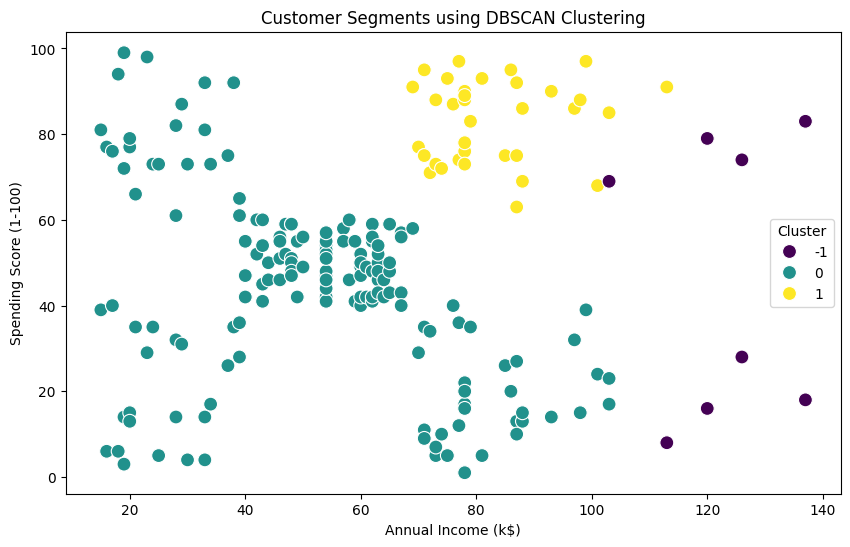

In [18]:
from sklearn.cluster import DBSCAN

# Implementing DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Add the DBSCAN cluster labels to the original data
df['DBSCAN_Cluster'] = dbscan_labels

# Visualizing the DBSCAN clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', palette='viridis', data=df, s=100)
plt.title('Customer Segments using DBSCAN Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()

#### Visualization:

The scatter plot shows how DBSCAN segmented the customers. Unlike K-Means and Hierarchical Clustering, DBSCAN is able to identify clusters of varying shapes and densities, and it effectively marks outliers.

In [19]:
# Analyzing the unique clusters and any noise points identified by DBSCAN
dbscan_cluster_counts = df['DBSCAN_Cluster'].value_counts()
dbscan_cluster_counts

DBSCAN_Cluster
 0    157
 1     35
-1      8
Name: count, dtype: int64

#### Cluster Identification:

- Cluster 0: The largest cluster, containing 157 customers.
- Cluster 1: A smaller cluster, containing 35 customers.
- Noise Points (-1): DBSCAN identified 8 data points as noise, which don't fit well into any cluster. These could represent outliers or customers with unique behavior.

## 2) Dimensionality Reduction Technique

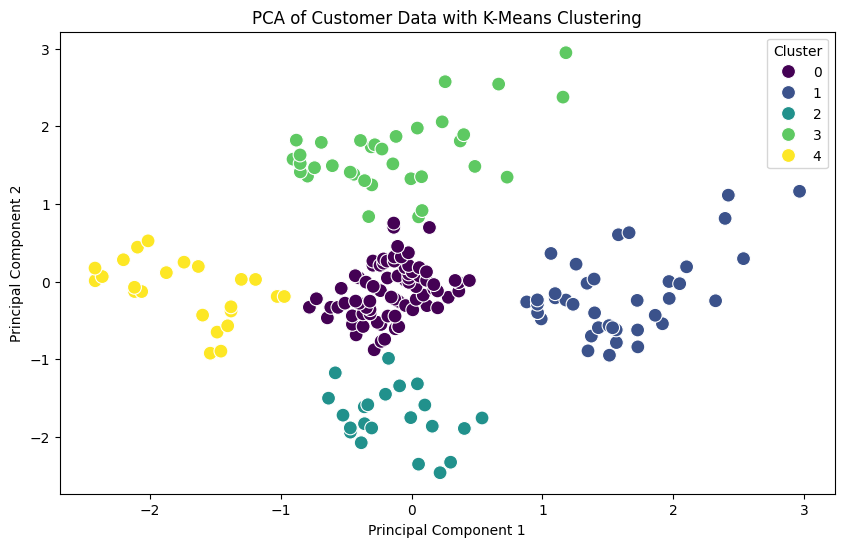

In [20]:
from sklearn.decomposition import PCA

# Applying PCA to reduce the dataset to 2 components (even though we already have 2 features, this demonstrates the technique)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Visualizing the results of PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=df['KMeans_Cluster'], palette='viridis', s=100)
plt.title('PCA of Customer Data with K-Means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

#### Visualization:

The scatter plot shows the data projected onto the two principal components, with K-Means cluster labels overlaid. This visualization demonstrates how PCA can help in visualizing complex data in a simplified manner, even though in this case, we started with only two features.

In [21]:
# Analyzing the explained variance by PCA
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.50495142, 0.49504858])

#### Explained Variance:

The two principal components explain approximately 50% of the variance each, which is expected since we started with two features. In more complex datasets, PCA would typically be used to reduce the dimensionality while retaining most of the variance.

## 3) Real-World Application Scenario

#### Scenario: Personalized Marketing Strategy for a Retail Chain

Business Context: A retail chain wants to develop a personalized marketing strategy to boost sales and customer loyalty. The company has customer data, including annual income and spending score, and seeks to segment its customers for targeted marketing campaigns.

#### Application of Clustering Techniques:

- K-Means Clustering: Useful for identifying clear, distinct customer segments, which can be targeted with specific marketing strategies. For example:

    - High Income, High Spending: Premium product promotions.
Low Income, High Spending: Discount offerings and loyalty programs.

- Hierarchical Clustering: Offers insight into the hierarchical structure of customer segments, helping in understanding sub-segments within broader categories. This could be useful for layered marketing strategies, where primary segments are targeted first, followed by more specific sub-segments.

- DBSCAN Clustering: Helps identify outliers or niche customer groups that might require specialized attention. For instance, customers identified as noise points might be invited to focus groups or offered personalized services to understand their unique preferences.

#### Application of PCA:

Dimensionality Reduction: If the retail chain collects more features (e.g., purchase frequency, online engagement), PCA can simplify the dataset while retaining the most critical information. This enables the marketing team to visualize customer segments easily and make data-driven decisions without being overwhelmed by too many variables.

#### Strategic Insights:

By combining clustering and PCA, the retail chain can develop a multi-faceted marketing approach that addresses both broad customer needs and specific preferences. This not only enhances customer satisfaction but also maximizes the efficiency of marketing campaigns by targeting the right customers with the right products.